<a href="https://colab.research.google.com/github/frm1789/Capstone/blob/main/Times_Series_IL_Arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
!pip install statsmodels

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/frm1789/Capstone/main/Cook_County_Time_series.csv')


In [9]:
df.index = pd.to_datetime(df['Zip'])
df = df.drop(columns = ['Zip'])

In [5]:
df.tail(10)

,60657,60614,60640,60647,60618,60613,60629,60625,60619,60617,...,60022,60195,60480,60461,60469,60163,60203,60301,60476,60043
Zip,,,,,,,,,,,,,,,,,,,,,
2016-12-01,318100,415200,200200,324800,330000,199400,157700,258100,143600,116400,...,1012600,141800,226300,192300,87300,166200,405900,141900,93800,1335000
2017-01-01,318500,414700,201700,327100,332400,201800,158500,260500,144000,117400,...,1009600,144600,231100,193700,88200,167200,407400,144300,93900,1335000
2017-02-01,319600,415400,203600,328700,333000,202400,159600,262400,143400,118400,...,988600,146800,235100,197500,88500,168300,408400,145400,94100,1318600
2017-03-01,321100,410700,205000,329400,332200,202500,160400,262500,142600,119000,...,971100,147600,235900,201500,89500,169700,408900,146200,95700,1307800
2017-04-01,323100,400400,204700,329800,331100,202900,160200,261800,142200,119300,...,968100,147700,236200,202700,93100,170900,408700,148900,99900,1306500
2017-05-01,324900,402400,204200,330900,330500,204000,159400,262100,142800,119000,...,969300,147600,237100,203500,96100,171500,409700,152000,104500,1304800
2017-06-01,325600,411400,204700,331800,331600,205300,158200,263900,143800,118100,...,962100,147800,238600,206200,95600,171700,412900,151600,106700,1300700
2017-07-01,325000,411800,206700,331900,332800,207100,157200,265100,143700,117300,...,952600,148000,239500,209100,93600,171000,415600,148900,106800,1304800
2017-08-01,325600,412300,209500,332300,333300,209100,157800,265900,143700,117900,...,949700,147800,239700,211300,92700,170500,415900,148300,107400,1324100


In [ ]:
ts = df
ts

,60657,60614,60640,60647,60618,60613,60629,60625,60619,60617,...,60022,60195,60480,60461,60469,60163,60203,60301,60476,60043
Zip,,,,,,,,,,,,,,,,,,,,,
1996-04-01,146700,198000,102300,124500,140900,106100,94800,132700,77000,75700,...,540300,84100,165100,223900,84300,118400,210800,112200,89600,742300
1996-05-01,146500,195500,101300,124000,140300,105300,94900,132200,76900,75800,...,536900,84500,165600,222000,83600,120900,213800,111500,90200,731500
1996-06-01,146300,194200,100700,123600,139500,104500,94700,131400,77400,75800,...,537700,84700,166300,216800,83000,122600,215200,111800,91600,729700
1996-07-01,146300,193800,100600,124100,139000,104700,94700,130000,77800,75600,...,542600,85000,167200,210500,82500,122700,216300,112200,92900,738400
1996-08-01,146800,193900,100700,124600,138700,105000,94400,128800,78200,75400,...,543300,85700,167700,207600,82300,122300,217400,111900,93600,742000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-05-01,324900,402400,204200,330900,330500,204000,159400,262100,142800,119000,...,969300,147600,237100,203500,96100,171500,409700,152000,104500,1304800
2017-06-01,325600,411400,204700,331800,331600,205300,158200,263900,143800,118100,...,962100,147800,238600,206200,95600,171700,412900,151600,106700,1300700
2017-07-01,325000,411800,206700,331900,332800,207100,157200,265100,143700,117300,...,952600,148000,239500,209100,93600,171000,415600,148900,106800,1304800


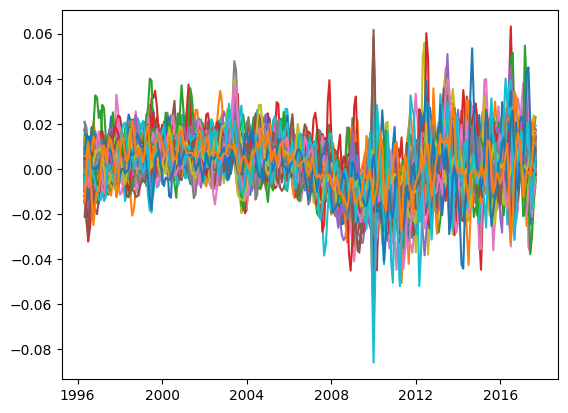

In [ ]:
plt.plot(ts)

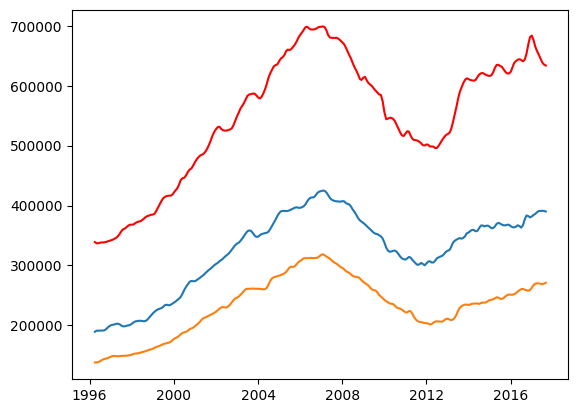

In [ ]:
plt.plot(ts.index, ts['60201'])
plt.plot(ts.index, ts['60202'])
plt.plot(ts.index, ts['60091'], color = 'red')


In [ ]:
!pip install statsmodels

In [ ]:
import statsmodels.tsa.stattools as tsa
from statsmodels.tsa.stattools import adfuller

In [ ]:
# passing the extracted passengers count to adfuller function.
# result of adfuller function is stored in a res variable
res = adfuller(ts['60091'])

# Printing the statistical result of the adfuller test
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])

# printing the critical values at different alpha levels.
print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))

Augmneted Dickey_fuller Statistic: -2.458913
p-value: 0.125794
critical values at different levels:
	1%: -3.457
	5%: -2.873
	10%: -2.573


In [ ]:
ts = np.log(ts).diff().dropna()

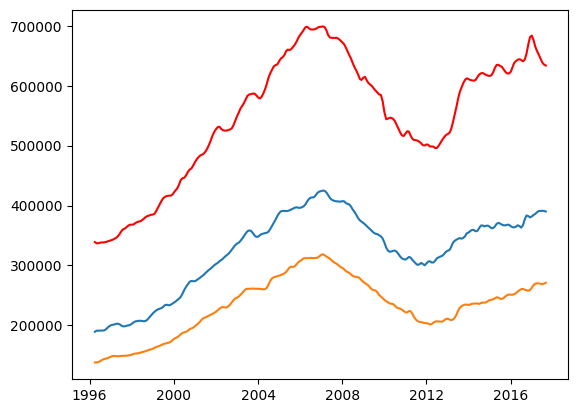

In [ ]:
plt.plot(df.index, df['60201'])
plt.plot(df.index, df['60202'])
plt.plot(df.index, df['60091'], color = 'red')

In [ ]:
#https://www.geeksforgeeks.org/how-to-check-if-time-series-data-is-stationary-with-python/
#https://builtin.com/data-science/time-series-python

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
adft = adfuller(df['60091'],autolag="AIC")

In [ ]:
output_df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]  , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used",
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)


       Values                       Metric
0   -2.458913              Test Statistics
1    0.125794                      p-value
2   13.000000             No. of lags used
3  244.000000  Number of observations used
4   -3.457438          critical value (1%)
5   -2.873459          critical value (5%)
6   -2.573122         critical value (10%)


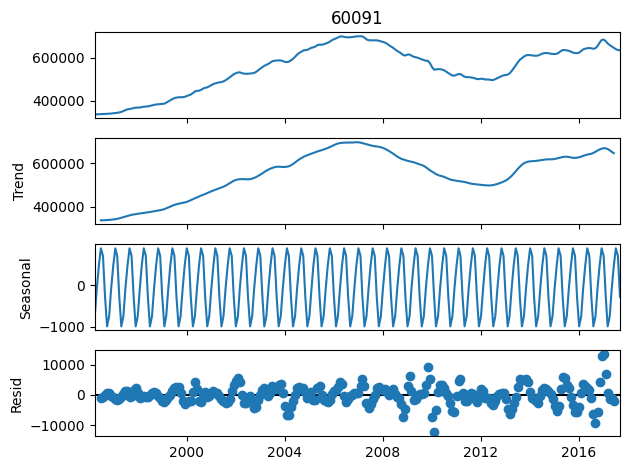

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(df['60091'],model='additive', period=7)
decompose.plot()
plt.show()

In [ ]:
small = ts['60091']

In [ ]:
small

Zip
1996-05-01   -0.005917
1996-06-01    0.000297
1996-07-01    0.002666
1996-08-01    0.001183
1996-09-01    0.000000
                ...   
2017-05-01   -0.009007
2017-06-01   -0.010328
2017-07-01   -0.010122
2017-08-01   -0.005651
2017-09-01   -0.002522
Name: 60091, Length: 257, dtype: float64

In [ ]:
len(small)

257

In [ ]:
train = small.head(220)
test = small.tail(37)

In [ ]:
!pip install pmdarima

In [ ]:
from pmdarima.arima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1864.747, Time=0.66 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1750.935, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1771.011, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1830.532, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1752.912, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1837.422, Time=0.39 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1867.866, Time=0.39 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1828.554, Time=0.72 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1848.897, Time=0.20 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1866.888, Time=0.45 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-1862.306, Time=0.15 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1872.316, Time=0.84 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-1879.724, Time=0.22 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-1866.211, Time=0.65 sec
 ARIMA(5,1,2)(0,0,0

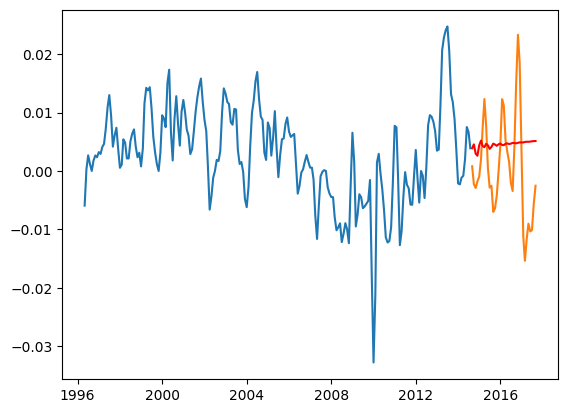

In [ ]:
#Plotting Train, Test, Prediction
plt.plot(train.index, train)
plt.plot(test.index, test)
plt.plot(forecast.index, forecast, color = 'red')

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rms = sqrt(mean_squared_error(test,forecast))
print("RMSE: ", rms)

RMSE:  0.009498059698145937
